In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams['figure.figsize'] = [15, 60]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
taxa = pd.read_csv("Raw_NOW_data/now_export_2021-11-15.csv", delimiter=",")
#,    usecols=["ORDER", "FAMILY", "GENUS", "SPECIES", "MAX_AGE", "MIN_AGE", "LIDNUM","NAME", "BODYMASS", "DIET_1", "DIET_2", "DIET_3"],                    comment='#', na_values="\\N")
#taxa
#print(taxa)
#print(taxa.isna().any())
taxa = taxa.fillna(-999)
#print(taxa.isna().any())
print(taxa.shape)

with open('Raw_NOW_data/NOW_species_log.txt','w') as file:
    line = "Initial no. of occurences:"+str(taxa.shape[0])
    file.write(line)

indet_sp = taxa['SPECIES']=="indet." 
NA_sp = taxa['SPECIES']==-999 
NA_g = taxa['GENUS']==-999
NA_f = taxa['FAMILY']==-999
empty_f = taxa['FAMILY']=="\\N"
empty_g = taxa['GENUS']=="\\N"
empty_s = taxa['SPECIES']=="\\N"
not_sp = taxa['SPECIES']=="sp."
Indet_genus = taxa['GENUS']=="Indet."
indet_fam = taxa['FAMILY']=="indet." 
empty_lat = taxa['LAT']=="\\N"
empty_long = taxa['LONG']=="\\N"


indet_genus = taxa['GENUS']=="indet." 
not_genus = taxa['GENUS']=="gen." 
not_genus_1 = taxa['GENUS']=="Gen." 
inc_sedis_g = taxa['GENUS']=="incertae sedis"
inc_sedis_f = taxa['FAMILY']=="incertae sedis"
inc_sedis_ff = taxa['FAMILY']=="incertaesedis"

inc_sedis_o = taxa['ORDER']=="incertae sedis"
bad_min_age = taxa['MIN_AGE'] == -999
bad_min_age_n = taxa['MIN_AGE'] == "\\N"
bad_max_age = taxa['MAX_AGE'] == -999
nomen_nudum_f = taxa['FAMILY'] == "nomen nudum"
nomen_nudum_g = taxa['GENUS'] == "nomen nudum"
bad_age = taxa['MAX_AGE'] > 100
not_ok = NA_g|NA_f| indet_genus | Indet_genus| not_genus | not_genus_1|empty_lat|empty_long|empty_g| empty_f| \
indet_fam|inc_sedis_o| inc_sedis_f| inc_sedis_ff|inc_sedis_g | bad_age | bad_max_age | bad_min_age| bad_min_age_n|\
nomen_nudum_f | nomen_nudum_g#| indet_sp | not_sp | NA_sp


taxa =taxa[~not_ok]
taxa.MIN_AGE = np.array(taxa.MIN_AGE).astype(float)

print("After initial cleanup:")
print(taxa.shape)

with open('Raw_NOW_data/NOW_species_log.txt','a') as file:
    line = "\nAfter initial cleanup:"+str(taxa.shape[0])
    file.write(line)

#Geography cleanup
bad_country_list = list(pd.read_csv("Raw_NOW_data/bad_countries.csv", delimiter=","))
print(bad_country_list)
print(len(taxa))
for i, country in enumerate(bad_country_list):
    filt = taxa["COUNTRY"]==country
    taxa = taxa[~filt]
    print("After ",country,len(taxa))
print("After geography cleanup:")
print(taxa.shape)

with open('Raw_NOW_data/NOW_species_log.txt','a') as file:
    line = "\nAfter geographic cleanup:"+str(taxa.shape[0])
    file.write(line)

#Order cleanup
print(np.unique(taxa["ORDER"]))
reject_orders = list(pd.read_csv("Raw_NOW_data/reject_orders.csv", delimiter=","))
for i, taxon in enumerate(reject_orders):
    print(taxon)
    filt = taxa["ORDER"]==taxon
    taxa = taxa[~filt]
    print(len(taxa))

with open('Raw_NOW_data/NOW_species_log.txt','a') as file:
    line = "\nAfter order cleanup:"+str(taxa.shape[0])
    file.write(line)
    line = "\nRemaining orders: "+str(np.unique(taxa["ORDER"]))
    file.write(line)
    line = "\nNo. of remaining families: "+str(len(np.unique(taxa["FAMILY"])))
    file.write(line)

    reject_families = ['Tapiridae', 'Tapiroidea', 'Enaliarctidae', 'Amphicynodontidae', 'Odobenidae', 'Otariidae', 'Phocidae']

for i, taxon in enumerate(reject_families):
    filt = taxa["FAMILY"]==taxon
    taxa = taxa[~filt]
    print(len(taxa))

with open('Raw_NOW_data/NOW_species_log.txt','a') as file:
    line = "\nAfter selected family cleanup:"+str(taxa.shape[0])
    file.write(line)
    line = "\nNo. of remaining families: "+str(len(np.unique(taxa["FAMILY"])))
    file.write(line)
    
print("total families:")
display(len(np.unique(taxa["FAMILY"])))


taxa.to_csv("Raw_NOW_data/species_occ_cleaned.csv", index=False, sep=',', header=True)     
taxa.to_csv("Raw_NOW_data/species_level_coordinates.csv", index=False, sep=',', header=True, columns = ["LAT", "LONG"])

np.savetxt("Raw_NOW_data/species_level_families.csv", np.unique(taxa["FAMILY"]), fmt="%s")     

#Write out a file with number of species in each family
for i, family in enumerate(np.unique(taxa["FAMILY"])):
    species = len(np.unique(taxa[taxa["FAMILY"]==family]["SPECIES"]))
    txt = family + ","+str(species)+'\n'
    with open('Raw_NOW_data/species_in_families.csv','a') as file:
        for line in txt:
            file.write(line)

#Write out a file with number of species in each order:
for i, family in enumerate(np.unique(taxa["ORDER"])):
    species = len(np.unique(taxa[taxa["ORDER"]==family]["SPECIES"]))
    txt = family + ","+str(species)+'\n'
    with open('Raw_NOW_data/species_in_orders.csv','a') as file:
        for line in txt:
            file.write(line)
    


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(68351, 88)
After initial cleanup:
(66578, 88)
['Australia', 'Papua New Guinea', 'Panama', 'Venezuela', 'Argentina', 'Bolivia', 'Chile', 'Paraguay', 'Peru', 'Uruguay', 'Brazil', 'Ecuador', 'Colombia', 'Madagascar', 'Seychelles', 'Reunion', 'East Timor', 'Philippines', 'Indonesia', 'Maldives', 'New Zealand', 'Sri Lanka', 'Malaysia']
66578
After  Australia 66511
After  Papua New Guinea 66511
After  Panama 66501
After  Venezuela 66483
After  Argentina 66132
After  Bolivia 65998
After  Chile 65959
After  Paraguay 65959
After  Peru 65947
After  Uruguay 65947
After  Brazil 65888
After  Ecuador 65888
After  Colombia 65823
After  Madagascar 65820
After  Seychelles 65820
After  Reunion 65820
After  East Timor 65820
After  Philippines 65792
After  Indonesia 65543
After  Maldives 65543
After  New Zealand 65542
After  Sri Lanka 65519
After  Malaysia 65465
After geography cleanup:
(65465, 88)
['Afrosoricida' 'Amphitheriida' 'Arctostylopida' 'Artiodactyla'
 'Astrapotheria' 'Carnivora' 'Cetacea' 'Chi

146

['Australia', 'Papua New Guinea', 'Argentina', 'Bolivia', 'Chile', 'Paraguay', 'Peru', 'Uruguay', 'Brazil', 'Equador', 'Colombia', 'Madagascar', 'Seychelles', 'Reunion', 'East Timor', 'Indonesia', 'Maldives', 'New Zealand']
49188
After  Australia 49139
After  Papua New Guinea 49139
After  Argentina 48828
After  Bolivia 48714
After  Chile 48682
After  Paraguay 48682
After  Peru 48674
After  Uruguay 48674
After  Brazil 48631
After  Equador 48631
After  Colombia 48574
After  Madagascar 48572
After  Seychelles 48572
After  Reunion 48572
After  East Timor 48572
After  Indonesia 48356
After  Maldives 48356
After  New Zealand 48356
After geography cleanup:
(48356, 88)


At the beginning: 48356
['Afrosoricida' 'Amphitheriida' 'Arctostylopida' 'Artiodactyla'
 'Astrapotheria' 'Carnivora' 'Cetacea' 'Chiroptera' 'Cimolesta'
 'Cingulata' 'Condylarthra' 'Creodonta' 'Dermoptera' 'Didelphimorphia'
 'Dinocerata' 'Embrithopoda' 'Erinaceomorpha' 'Eulipotyphla' 'Hyaenodonta'
 'Hyracoidea' 'Lagomorpha' 'Leptictida' 'Litopterna' 'Macroscelidea'
 'Mesonychia' 'Microbiotheria' 'Mimotonida' 'Mixodontia'
 'Multituberculata' 'Palaeanodonta' 'Perissodactyla' 'Pholidota' 'Pilosa'
 'Polydolopimorphia' 'Preptotheria' 'Primates' 'Proboscidea' 'Procreodi'
 'Ptolemaiida' 'Rodentia' 'Scandentia' 'Sirenia' 'Taeniodonta'
 'Tubulidentata']
Amphitheriida
48355
Afrosoricida
48326
Ameridelphia
48326
Arctostylopida
48317
Astrapotheria
48316
Cetacea
48295
Chiroptera
47801
Cingulata
47743
Dasyuromorphia
47743
Dermoptera
47696
Didelphimorphia
47513
Diprotodontia
47513
Erinaceomorpha
47512
Eulipotyphla
43883
Lagomorpha
42296
Litopterna
42295
Macroscelidea
42240
Microbiotheria
42238
Mimoton

25075
25003
24997
24990
24989
24988
24961
total families:


138

4745

(array([959., 511., 680., 451., 545., 359.,  79.,  47.,  63.,  49., 162.,
         34.,  29.,  17., 107., 160., 257., 122.,  90.,  24.]),
 array([2.6740000e-02, 3.3221530e+00, 6.6175660e+00, 9.9129790e+00,
        1.3208392e+01, 1.6503805e+01, 1.9799218e+01, 2.3094631e+01,
        2.6390044e+01, 2.9685457e+01, 3.2980870e+01, 3.6276283e+01,
        3.9571696e+01, 4.2867109e+01, 4.6162522e+01, 4.9457935e+01,
        5.2753348e+01, 5.6048761e+01, 5.9344174e+01, 6.2639587e+01,
        6.5935000e+01]),
 <BarContainer object of 20 artists>)

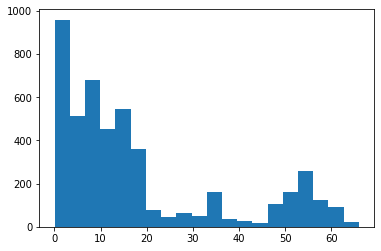

In [297]:
herbivores = taxa[taxa["DIET_1"]=="a"]
display(len(herbivores))
plt.hist((herbivores["MAX_AGE"] + herbivores["MIN_AGE"])/2, bins=20)